#Sprint 5



## Descrição

Visualizando as variáveis

IDENTIFICAÇÃO DAS VARIÁVEIS:

* Rank, 
* Player, 
* Position, 
* Age, 
* Team, 
* Games, 
* Games Started, 
* Minutes Played, 
* Field Goals, 
* Field Goal Attempts, 
* Field Goals Percentage,
* 3-Points Field Goals, 
* 3-Points Field Goals Attempts, 
* 3-Points Field Goals Percentage, 
* 2-Points Field Goals, 
* 2-Points Field Goals Attempts, 
* 2-Points Field Goals Percentage, 
* Effective Field Goals Percentage, 
* Free Throw, 
* Free Throw Attempt, 
* Free Throw Percentage, 
* Offensive Rebounds, 
* Defensive Rebounds, 
* Total Rebounds, 
* Assists, 
* Steals, 
* Blocks, 
* Turnovers, 
* Personal Fouls. 


##Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

## Web Scraping

Armazenando a url onde os dados se encontram

In [2]:
req = requests.get('https://www.basketball-reference.com/leagues/NBA_2021_totals.html')
if req.status_code == 200:
    print('Requisição bem sucedida!')
    content = req.content

Requisição bem sucedida!


Utilizando biblioteca BeautifulSoup para extrair a tabela

In [3]:
soup = BeautifulSoup(content, 'html.parser')
table = soup.find(name='table')

Carregando os dados 

In [4]:
table_str = str(table)
df = pd.read_html(table_str)[0]

Removendo os index da tabela

In [5]:
drop_indexes = df[df['Rk'] == 'Rk'].index    
df.drop(drop_indexes, inplace=True)          

Criar um backup do data frame com todas as colunas para se precisar em algum momento.

In [6]:
df_bk = df.copy()

Removendo colunas (orientação Alan)

In [7]:
df = df.drop(columns=['FG','FGA','3P','3PA','2P','2PA','FT','FTA'])

Visualizando formato das varáveis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 705 entries, 0 to 730
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rk      705 non-null    object
 1   Player  705 non-null    object
 2   Pos     705 non-null    object
 3   Age     705 non-null    object
 4   Tm      705 non-null    object
 5   G       705 non-null    object
 6   GS      705 non-null    object
 7   MP      705 non-null    object
 8   FG%     703 non-null    object
 9   3P%     670 non-null    object
 10  2P%     699 non-null    object
 11  eFG%    703 non-null    object
 12  FT%     676 non-null    object
 13  ORB     705 non-null    object
 14  DRB     705 non-null    object
 15  TRB     705 non-null    object
 16  AST     705 non-null    object
 17  STL     705 non-null    object
 18  BLK     705 non-null    object
 19  TOV     705 non-null    object
 20  PF      705 non-null    object
 21  PTS     705 non-null    object
dtypes: object(22)
memory usage

Convertendo variáveis em numéricas

In [9]:
numeric_cols = df.columns.drop(['Pos','Player','Tm'])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 705 entries, 0 to 730
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      705 non-null    int64  
 1   Player  705 non-null    object 
 2   Pos     705 non-null    object 
 3   Age     705 non-null    int64  
 4   Tm      705 non-null    object 
 5   G       705 non-null    int64  
 6   GS      705 non-null    int64  
 7   MP      705 non-null    int64  
 8   FG%     703 non-null    float64
 9   3P%     670 non-null    float64
 10  2P%     699 non-null    float64
 11  eFG%    703 non-null    float64
 12  FT%     676 non-null    float64
 13  ORB     705 non-null    int64  
 14  DRB     705 non-null    int64  
 15  TRB     705 non-null    int64  
 16  AST     705 non-null    int64  
 17  STL     705 non-null    int64  
 18  BLK     705 non-null    int64  
 19  TOV     705 non-null    int64  
 20  PF      705 non-null    int64  
 21  PTS     705 non-null    int64  
dtypes:

## Verificando qualidade do banco de dados

In [11]:
df.head(10)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG%,3P%,2P%,eFG%,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF,21,MIA,61,4,737,0.544,0.000,0.546,0.544,0.509,73,135,208,29,20,28,43,91,304
1,2,Jaylen Adams,PG,24,MIL,7,0,18,0.125,0.000,0.167,0.125,NaN,0,3,3,2,0,0,0,1,2
2,3,Steven Adams,C,27,NOP,58,58,1605,0.614,0.000,0.620,0.614,0.444,213,301,514,111,54,38,78,113,438
3,4,Bam Adebayo,C,23,MIA,64,64,2143,0.570,0.250,0.573,0.571,0.799,142,431,573,346,75,66,169,145,1197
4,5,LaMarcus Aldridge,C,35,TOT,26,23,674,0.473,0.388,0.505,0.525,0.872,19,99,118,49,11,29,27,47,352
5,5,LaMarcus Aldridge,C,35,SAS,21,18,544,0.464,0.360,0.509,0.518,0.838,17,77,94,36,8,18,20,36,288
6,5,LaMarcus Aldridge,C,35,BRK,5,5,130,0.521,0.800,0.488,0.563,1.000,2,22,24,13,3,11,7,11,64
7,6,Ty-Shon Alexander,SG,22,PHO,15,0,47,0.250,0.222,0.333,0.333,0.500,2,8,10,6,0,1,3,2,9
8,7,Nickeil Alexander-Walker,SG,22,NOP,46,13,1007,0.419,0.347,0.485,0.502,0.727,13,131,144,102,47,22,69,88,508
9,8,Grayson Allen,SG,25,MEM,50,38,1259,0.418,0.391,0.471,0.547,0.868,19,141,160,108,46,8,48,71,532


**Verificando valores faltantes**

In [12]:
df.isnull().sum()

Rk         0
Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG%        2
3P%       35
2P%        6
eFG%       2
FT%       29
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
dtype: int64

Vamos analisar caso por caso para ver esses dados faltando.

Vamos começar pelo FG%.

In [13]:
df[df['FG%'].isnull()]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG%,3P%,2P%,eFG%,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
130,100,Gary Clark,SF,26,DEN,2,0,4,NaN,NaN,NaN,NaN,NaN,0,1,1,0,0,0,0,0,0
258,194,Ashton Hagans,PG,21,MIN,2,0,4,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1,0,0


Podemos ver que onde os dados de porcentagem estão faltado a quantidade real do jogador é zero. Como se trata de porcentagem de cestas feitas em relação as cestas tentadas o valor dessa metrica seria zero dividido por alguma coisa. Nesse caso substituir por zero seria uma opção.

Vamos analisar os outros para ver se é o mesmo caso:

In [14]:
df[df['3P%'].isnull()]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG%,3P%,2P%,eFG%,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
11,9,Jarrett Allen,C,22,BRK,12,5,320,0.677,NaN,0.677,0.677,0.754,38,87,125,20,7,19,22,21,134
18,13,Kostas Antetokounmpo,PF,23,LAL,15,0,56,0.300,NaN,0.300,0.300,0.462,4,15,19,1,2,4,11,8,12
31,23,Udoka Azubuike,C,21,UTA,15,0,57,0.444,NaN,0.444,0.444,0.800,4,9,13,0,1,4,3,9,16
50,40,Jordan Bell,C,26,GSW,1,0,15,0.000,NaN,0.000,0.000,0.500,1,4,5,2,0,2,1,2,1
70,55,Marques Bolden,C,22,CLE,6,0,29,0.333,NaN,0.333,0.333,0.625,3,3,6,0,2,2,2,0,7
85,64,Ignas Brazdeikis,SF,22,NYK,4,0,7,0.000,NaN,0.000,0.000,1.000,1,1,2,1,0,0,1,0,2
90,67,Amida Brimah,C,26,IND,5,0,29,0.625,NaN,0.625,0.625,1.000,2,6,8,1,0,5,4,4,13
98,75,Moses Brown,C,21,OKC,43,32,920,0.545,NaN,0.545,0.545,0.619,154,229,383,10,31,47,43,93,370
112,86,Devontae Cacok,PF,24,LAL,20,1,98,0.586,NaN,0.586,0.586,0.455,12,20,32,1,5,4,5,8,39
117,91,Clint Capela,C,26,ATL,63,63,1898,0.594,NaN,0.594,0.594,0.573,297,606,903,49,44,129,73,145,956


In [15]:
df[df['2P%'].isnull()]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG%,3P%,2P%,eFG%,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
130,100,Gary Clark,SF,26,DEN,2,0,4,NaN,NaN,NaN,NaN,NaN,0,1,1,0,0,0,0,0,0
157,117,Nate Darling,SG,22,CHO,7,0,26,0.286,0.286,NaN,0.429,1.0,1,0,1,1,0,1,1,1,9
258,194,Ashton Hagans,PG,21,MIN,2,0,4,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1,0,0
405,294,Meyers Leonard,C,28,MIA,3,2,29,0.429,0.429,NaN,0.643,0.5,0,7,7,2,0,0,2,5,10
421,307,Will Magnay,C,22,NOP,1,0,3,0.000,0.000,NaN,0.000,NaN,0,0,0,0,0,0,1,1,0
526,393,Anžejs Pasečņiks,C,25,WAS,1,0,6,0.000,0.000,NaN,0.000,NaN,1,0,1,1,0,0,5,2,0


In [16]:
df[df['eFG%'].isnull()]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG%,3P%,2P%,eFG%,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
130,100,Gary Clark,SF,26,DEN,2,0,4,NaN,NaN,NaN,NaN,NaN,0,1,1,0,0,0,0,0,0
258,194,Ashton Hagans,PG,21,MIN,2,0,4,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1,0,0


In [17]:
df[df['FT%'].isnull()]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG%,3P%,2P%,eFG%,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,2,Jaylen Adams,PG,24,MIL,7,0,18,0.125,0.000,0.167,0.125,NaN,0,3,3,2,0,0,0,1,2
49,40,Jordan Bell,C,26,WAS,5,1,67,0.350,0.000,0.389,0.350,NaN,6,13,19,5,3,3,3,5,14
66,51,Keljin Blevins,SF,25,POR,17,0,75,0.250,0.250,0.250,0.300,NaN,3,7,10,4,2,0,5,8,12
71,56,Jordan Bone,PG,23,ORL,14,0,196,0.426,0.313,0.591,0.519,NaN,4,20,24,18,2,0,3,11,56
86,64,Ignas Brazdeikis,SF,22,PHI,1,0,8,0.000,0.000,0.000,0.000,NaN,0,2,2,0,0,0,0,0,0
130,100,Gary Clark,SF,26,DEN,2,0,4,NaN,NaN,NaN,NaN,NaN,0,1,1,0,0,0,0,0,0
131,100,Gary Clark,PF,26,PHI,2,0,13,0.000,NaN,0.000,0.000,NaN,0,2,2,1,1,0,0,1,0
144,109,Tyler Cook,PF,23,BRK,4,0,17,0.333,NaN,0.333,0.333,NaN,1,1,2,2,0,0,1,2,2
180,133,Devon Dotson,PG,21,CHI,11,0,50,0.524,0.143,0.714,0.548,NaN,2,3,5,7,4,0,0,3,23
187,138,Jared Dudley,PF,35,LAL,12,0,81,0.222,0.333,0.000,0.333,NaN,4,17,21,5,1,1,2,7,6


Todos os dados faltando são devido ao mesmo problema de um zero dividido por algum valor. Dessa formas vamos preencher os campos faltando com ZERO para nao ter problemas ao rodar os algoritmos.

In [18]:
df.fillna(0,inplace=True)

print("Valores ausentes nos dados: {}".format(df.isnull().sum().sum()))

Valores ausentes nos dados: 0


In [19]:
df.shape

(705, 22)

**Jogadores Duplicados**

In [20]:
df.head(8)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG%,3P%,2P%,eFG%,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF,21,MIA,61,4,737,0.544,0.000,0.546,0.544,0.509,73,135,208,29,20,28,43,91,304
1,2,Jaylen Adams,PG,24,MIL,7,0,18,0.125,0.000,0.167,0.125,0.000,0,3,3,2,0,0,0,1,2
2,3,Steven Adams,C,27,NOP,58,58,1605,0.614,0.000,0.620,0.614,0.444,213,301,514,111,54,38,78,113,438
3,4,Bam Adebayo,C,23,MIA,64,64,2143,0.570,0.250,0.573,0.571,0.799,142,431,573,346,75,66,169,145,1197
4,5,LaMarcus Aldridge,C,35,TOT,26,23,674,0.473,0.388,0.505,0.525,0.872,19,99,118,49,11,29,27,47,352
5,5,LaMarcus Aldridge,C,35,SAS,21,18,544,0.464,0.360,0.509,0.518,0.838,17,77,94,36,8,18,20,36,288
6,5,LaMarcus Aldridge,C,35,BRK,5,5,130,0.521,0.800,0.488,0.563,1.000,2,22,24,13,3,11,7,11,64
7,6,Ty-Shon Alexander,SG,22,PHO,15,0,47,0.250,0.222,0.333,0.333,0.500,2,8,10,6,0,1,3,2,9


Existe jogadores que jogaram em mais de uma equipe na temporada. Então, além das observações individuais por equipe, ainda existe uma terceira linha que soma as suas médias durante a temporada. Isso existe para facilitar a análise do atleta durante a temporada toda. Para o modelo de ML, essa linha total não é interessante pq ela trata o TOT como um time (quando na verdade sabemos que não é). Outro motivo para exclirmos estas observações é que elas são apenas somas de outras duas (ou mais) observações existentes.

Deletando as observações TOT:

In [21]:
df.drop(df.loc[df['Tm']=='TOT'].index, inplace=True)

In [22]:
df.shape

(626, 22)

## Entendendo algumas caracteristicas do banco de dados

DADOS GERAIS INDIVIDUAIS

Qual a idade média dos atletas?

In [23]:
df['Age'].mean()

25.728434504792332

Qual atleta mais pontuou?

In [24]:
df[['Player', 'PTS']].sort_values('PTS', ascending=False)

,Player,PTS
156,Stephen Curry,2015
410,Damian Lillard,1928
356,Nikola Jokić,1898
46,Bradley Beal,1878
177,Luka Dončić,1830
...,...,...
526,Anžejs Pasečņiks,0
131,Gary Clark,0
130,Gary Clark,0
86,Ignas Brazdeikis,0


Qual a idade do atleta mais pontuou?

In [25]:
df[['Player', 'Age', 'PTS']].sort_values('PTS', ascending=False)

,Player,Age,PTS
156,Stephen Curry,32,2015
410,Damian Lillard,30,1928
356,Nikola Jokić,25,1898
46,Bradley Beal,27,1878
177,Luka Dončić,21,1830
...,...,...,...
526,Anžejs Pasečņiks,25,0
131,Gary Clark,26,0
130,Gary Clark,26,0
86,Ignas Brazdeikis,22,0


Em qual time o jogador que mais pontuou jogou?

In [26]:
df[['Player', 'Tm', 'PTS']].sort_values('PTS', ascending=False)

,Player,Tm,PTS
156,Stephen Curry,GSW,2015
410,Damian Lillard,POR,1928
356,Nikola Jokić,DEN,1898
46,Bradley Beal,WAS,1878
177,Luka Dončić,DAL,1830
...,...,...,...
526,Anžejs Pasečņiks,WAS,0
131,Gary Clark,PHI,0
130,Gary Clark,DEN,0
86,Ignas Brazdeikis,PHI,0


Qual a posição do jogador que mais pontuou?

In [27]:
df[['Player', 'Pos', 'PTS']].sort_values('PTS', ascending=False)

,Player,Pos,PTS
156,Stephen Curry,PG,2015
410,Damian Lillard,PG,1928
356,Nikola Jokić,C,1898
46,Bradley Beal,SG,1878
177,Luka Dončić,PG,1830
...,...,...,...
526,Anžejs Pasečņiks,C,0
131,Gary Clark,PF,0
130,Gary Clark,SF,0
86,Ignas Brazdeikis,SF,0


Quanto tempo o jogador que mais pontuou jogou?

In [28]:
df[['Player', 'MP', 'PTS']].sort_values('PTS', ascending=False)

,Player,MP,PTS
156,Stephen Curry,2152,2015
410,Damian Lillard,2398,1928
356,Nikola Jokić,2488,1898
46,Bradley Beal,2147,1878
177,Luka Dončić,2262,1830
...,...,...,...
526,Anžejs Pasečņiks,6,0
131,Gary Clark,13,0
130,Gary Clark,4,0
86,Ignas Brazdeikis,8,0


Quantos pontos por minutos jogados o jogador que mais pontuou fez?

In [29]:
2152/2015

1.0679900744416873

DADOS POR IDADE

Copiando e ajustando o data set

In [30]:
df_age = df_bk.copy()
numeric_cols = df_age.columns.drop(['Player','Pos','Tm', 'Age'])
df_age[numeric_cols] = df_age[numeric_cols].apply(pd.to_numeric)
df_age.drop(df_age.loc[df_age['Tm']=='TOT'].index, inplace=True)
df_age = df_age.drop(columns=['Rk', 'Player', 'Tm', 'Pos', 'FG','FGA','3P','3PA','2P','2PA','FT','FTA', 'TRB', 'G', 'GS'])
df_age.fillna(0, inplace = True)
df_age.head()

,Age,MP,FG%,3P%,2P%,eFG%,FT%,ORB,DRB,AST,STL,BLK,TOV,PF,PTS
0,21,737,0.544,0.00,0.546,0.544,0.509,73,135,29,20,28,43,91,304
1,24,18,0.125,0.00,0.167,0.125,0.000,0,3,2,0,0,0,1,2
2,27,1605,0.614,0.00,0.620,0.614,0.444,213,301,111,54,38,78,113,438
3,23,2143,0.570,0.25,0.573,0.571,0.799,142,431,346,75,66,169,145,1197
5,35,544,0.464,0.36,0.509,0.518,0.838,17,77,36,8,18,20,36,288


Novo formato do dataset

In [31]:
df_age.shape

(626, 15)

Distrubuição das idades pelo dataset

In [32]:
idades = df_age['Age'].value_counts()
idades.head(30)

23    68
22    64
25    56
24    55
27    49
26    48
21    48
28    46
30    34
20    30
29    25
31    23
32    22
19    14
34    14
33    11
35    11
36     5
38     1
37     1
40     1
Name: Age, dtype: int64

Ajustando idade como index

In [33]:
df_age = df_age.set_index('Age')
df_age.head()

,MP,FG%,3P%,2P%,eFG%,FT%,ORB,DRB,AST,STL,BLK,TOV,PF,PTS
Age,,,,,,,,,,,,,,
21,737,0.544,0.00,0.546,0.544,0.509,73,135,29,20,28,43,91,304
24,18,0.125,0.00,0.167,0.125,0.000,0,3,2,0,0,0,1,2
27,1605,0.614,0.00,0.620,0.614,0.444,213,301,111,54,38,78,113,438
23,2143,0.570,0.25,0.573,0.571,0.799,142,431,346,75,66,169,145,1197
35,544,0.464,0.36,0.509,0.518,0.838,17,77,36,8,18,20,36,288


Juntando idades em uma única variável

In [34]:
df_age = df_age.groupby(level = 0).mean().round(3)
df_age.head()

,MP,FG%,3P%,2P%,eFG%,FT%,ORB,DRB,AST,STL,BLK,TOV,PF,PTS
Age,,,,,,,,,,,,,,
19,997.143,0.425,0.308,0.473,0.479,0.770,37.000,139.357,104.214,32.857,22.286,69.929,81.143,424.429
20,894.433,0.422,0.282,0.490,0.474,0.720,33.833,117.367,81.367,24.200,15.567,49.100,75.033,385.933
21,680.542,0.435,0.273,0.495,0.490,0.672,31.458,97.458,66.083,19.521,14.333,39.667,60.292,325.333
22,721.656,0.427,0.290,0.464,0.491,0.688,31.438,103.172,63.406,21.844,16.344,40.547,58.031,343.000
23,592.897,0.447,0.282,0.509,0.509,0.696,25.809,80.544,55.044,19.794,14.500,32.735,51.029,272.206


In [35]:
df_age.shape

(21, 14)

Qual a idade pontuou mais e menos?

In [36]:
df_age[['MP', 'PTS']].sort_values('PTS', ascending=False)

,MP,PTS
Age,,
32,1076.727,553.636
36,982.000,527.800
29,1176.240,517.200
28,1014.609,476.109
30,961.500,453.706
31,946.739,451.217
26,870.354,426.604
19,997.143,424.429
34,958.286,400.357


Qual idade mais minutos jogou? E menos?

In [37]:
df_age[['MP', 'PTS']].sort_values('MP', ascending=False)

,MP,PTS
Age,,
37,1339.000,275.000
29,1176.240,517.200
32,1076.727,553.636
28,1014.609,476.109
19,997.143,424.429
36,982.000,527.800
30,961.500,453.706
34,958.286,400.357
31,946.739,451.217


Criando nova coluna e de média pontos por minutos jogados

In [38]:
df_age['MPontos_min'] = df_age['PTS']/df_age['MP']

Qual idade mais e menos pontuou em Pontos/MP?

In [39]:
df_age[['MPontos_min']].sort_values('MPontos_min', ascending=False)

,MPontos_min
Age,
40,1.333333
36,0.537475
32,0.514184
26,0.490150
25,0.485330
21,0.478050
31,0.476601
22,0.475296
30,0.471873


Platando algumas informações sobre idade

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# tranpondo
df_age = df_age.T

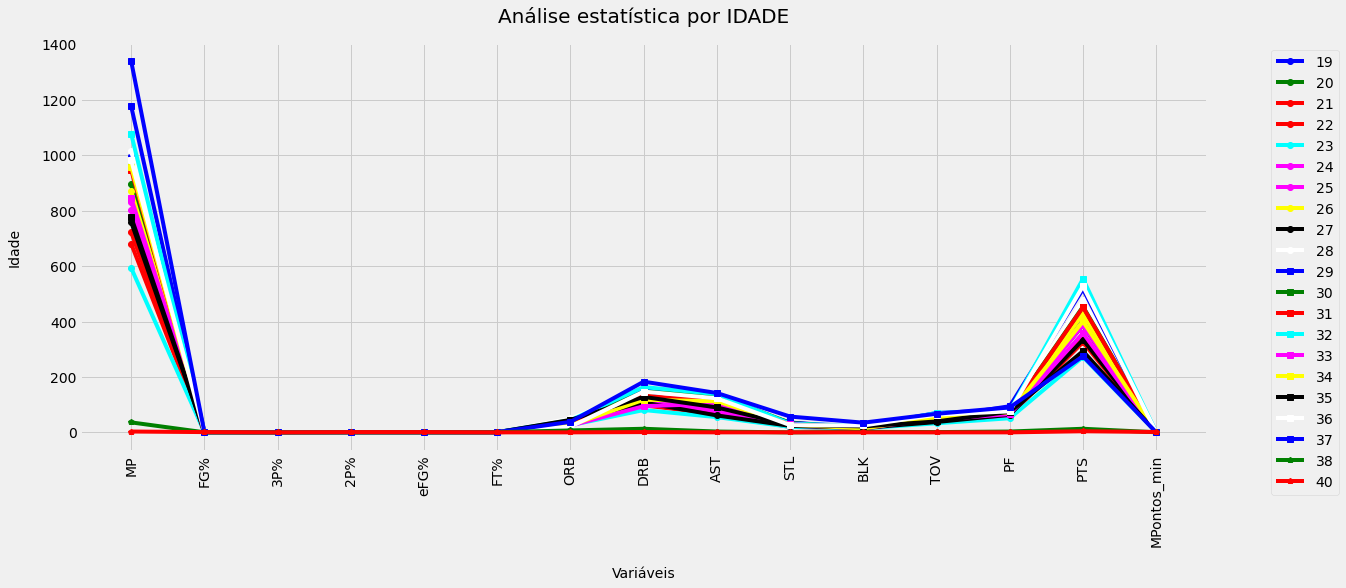

In [41]:
plt.style.use(['fivethirtyeight'])
sns.set_palette('hls')

fig, ax = plt.subplots(figsize = (18, 7))

ax.plot('19', data = df_age, marker = 'o', color = 'blue')
ax.plot('20', data = df_age, marker = 'o', color = 'green')
ax.plot('21', data = df_age, marker = 'o', color = 'red')
ax.plot('22', data = df_age, marker = 'o', color = 'red')
ax.plot('23', data = df_age, marker = 'o', color = 'cyan')
ax.plot('24', data = df_age, marker = 'o', color = 'magenta')
ax.plot('25', data = df_age, marker = 'o', color = 'magenta')
ax.plot('26', data = df_age, marker = 'o', color = 'yellow')
ax.plot('27', data = df_age, marker = 'o', color = 'black')
ax.plot('28', data = df_age, marker = 'o', color = 'white')
ax.plot('29', data = df_age, marker = 's', color = 'blue')
ax.plot('30', data = df_age, marker = 's', color = 'green')
ax.plot('31', data = df_age, marker = 's', color = 'red')
ax.plot('32', data = df_age, marker = 's', color = 'cyan')
ax.plot('33', data = df_age, marker = 's', color = 'magenta')
ax.plot('34', data = df_age, marker = 's', color = 'yellow')
ax.plot('35', data = df_age, marker = 's', color = 'black')
ax.plot('36', data = df_age, marker = 's', color = 'white')
ax.plot('37', data = df_age, marker = 's', color = 'blue')
ax.plot('38', data = df_age, marker = 'p', color = 'green')
ax.plot('40', data = df_age, marker = 'p', color = 'red')


ax.set_xlabel('Variáveis', fontsize = 14, labelpad = 20)
ax.set_ylabel('Idade', fontsize = 14, labelpad = 20)
ax.set_xticks(df_age.index)
ax.set_xticklabels(df_age.index, rotation = 90)
ax.set_title("Análise estatística por IDADE", fontsize = 20, pad = 20)
ax.legend(loc = 'upper left', bbox_to_anchor = (1.05, 1), frameon = True)

plt.axis('tight');

DADOS POR TIME

Copiando e ajustando o data set

In [42]:
df_tm = df_bk.copy()
numeric_cols = df_tm.columns.drop(['Player','Pos','Tm', 'Age'])
df_tm[numeric_cols] = df_tm[numeric_cols].apply(pd.to_numeric)
df_tm.drop(df_tm.loc[df_tm['Tm']=='TOT'].index, inplace=True)
df_tm = df_tm.drop(columns=['Rk', 'Player', 'Age', 'Pos', 'FG','FGA','3P','3PA','2P','2PA','FT','FTA', 'TRB', 'G', 'GS'])
df_tm.fillna(0, inplace = True)
df_tm.head()

,Tm,MP,FG%,3P%,2P%,eFG%,FT%,ORB,DRB,AST,STL,BLK,TOV,PF,PTS
0,MIA,737,0.544,0.00,0.546,0.544,0.509,73,135,29,20,28,43,91,304
1,MIL,18,0.125,0.00,0.167,0.125,0.000,0,3,2,0,0,0,1,2
2,NOP,1605,0.614,0.00,0.620,0.614,0.444,213,301,111,54,38,78,113,438
3,MIA,2143,0.570,0.25,0.573,0.571,0.799,142,431,346,75,66,169,145,1197
5,SAS,544,0.464,0.36,0.509,0.518,0.838,17,77,36,8,18,20,36,288


In [43]:
df_tm.shape

(626, 15)

Distrubuição dos times pelo dataset

In [44]:
times = df_tm['Tm'].value_counts()
times.head(30)

HOU    30
ORL    28
BRK    27
CLE    25
SAC    24
PHI    23
OKC    22
MIL    22
CHI    22
DEN    22
TOR    22
DET    21
BOS    21
MIA    21
NOP    21
WAS    21
IND    20
LAC    20
DAL    19
LAL    19
NYK    19
ATL    18
UTA    18
MEM    18
SAS    18
GSW    18
POR    17
CHO    17
PHO    17
MIN    16
Name: Tm, dtype: int64

Ajustando time como index

In [45]:
df_tm = df_tm.set_index('Tm')
df_tm.head()

,MP,FG%,3P%,2P%,eFG%,FT%,ORB,DRB,AST,STL,BLK,TOV,PF,PTS
Tm,,,,,,,,,,,,,,
MIA,737,0.544,0.00,0.546,0.544,0.509,73,135,29,20,28,43,91,304
MIL,18,0.125,0.00,0.167,0.125,0.000,0,3,2,0,0,0,1,2
NOP,1605,0.614,0.00,0.620,0.614,0.444,213,301,111,54,38,78,113,438
MIA,2143,0.570,0.25,0.573,0.571,0.799,142,431,346,75,66,169,145,1197
SAS,544,0.464,0.36,0.509,0.518,0.838,17,77,36,8,18,20,36,288


Juntando times iguals numa mesma observação

In [46]:
df_tm = df_tm.groupby(level = 0).mean().round(3)
df_tm.head()

,MP,FG%,3P%,2P%,eFG%,FT%,ORB,DRB,AST,STL,BLK,TOV,PF,PTS
Tm,,,,,,,,,,,,,,
ATL,966.889,0.432,0.283,0.472,0.497,0.784,42.222,140.278,96.500,27.944,19.000,50.778,77.333,454.778
BOS,827.714,0.471,0.301,0.529,0.541,0.718,36.429,115.286,80.429,26.476,18.238,45.905,70.048,386.143
BRK,644.667,0.434,0.277,0.487,0.493,0.646,23.704,94.778,71.444,17.926,14.037,34.963,50.778,316.185
CHI,790.000,0.456,0.290,0.546,0.514,0.710,31.500,115.636,87.591,21.909,13.818,47.500,61.909,362.227
CHO,1020.882,0.463,0.281,0.500,0.526,0.713,44.824,140.529,113.706,33.235,20.235,60.059,76.353,463.588


In [47]:
df_tm.shape

(30, 14)

Qual time pontuou mais e menos?

In [48]:
df_tm[['MP', 'PTS']].sort_values('PTS', ascending=False)

,MP,PTS
Tm,,
MIN,1087.812,504.562
POR,1017.882,491.765
PHO,1028.235,488.235
UTA,964.222,465.667
CHO,1020.882,463.588
GSW,961.389,454.833
ATL,966.889,454.778
MEM,966.889,453.167
SAS,971.111,444.333


Qual time mais minutos jogou? E menos?

In [49]:
df_tm[['MP', 'PTS']].sort_values('MP', ascending=False)

,MP,PTS
Tm,,
MIN,1087.812,504.562
PHO,1028.235,488.235
CHO,1020.882,463.588
POR,1017.882,491.765
SAS,971.111,444.333
ATL,966.889,454.778
MEM,966.889,453.167
UTA,964.222,465.667
GSW,961.389,454.833


Criando nova coluna e de média pontos por minutos jogados

In [50]:
df_tm['MPontos_min'] = df_tm['PTS']/df_tm['MP']


Qual time mais e menos pontuou em Pontos/MP?


In [51]:
df_tm[['MPontos_min']].sort_values('MPontos_min', ascending=False)

,MPontos_min
Tm,
MIL,0.498990
BRK,0.490463
POR,0.483126
UTA,0.482946
WAS,0.482505
IND,0.475705
LAC,0.475030
PHO,0.474828
DEN,0.473940


Platando algumas informações sobre time


In [52]:
# tranpondo
df_tm = df_tm.T

In [53]:
plt.style.use(['fivethirtyeight'])
sns.set_palette('hls')

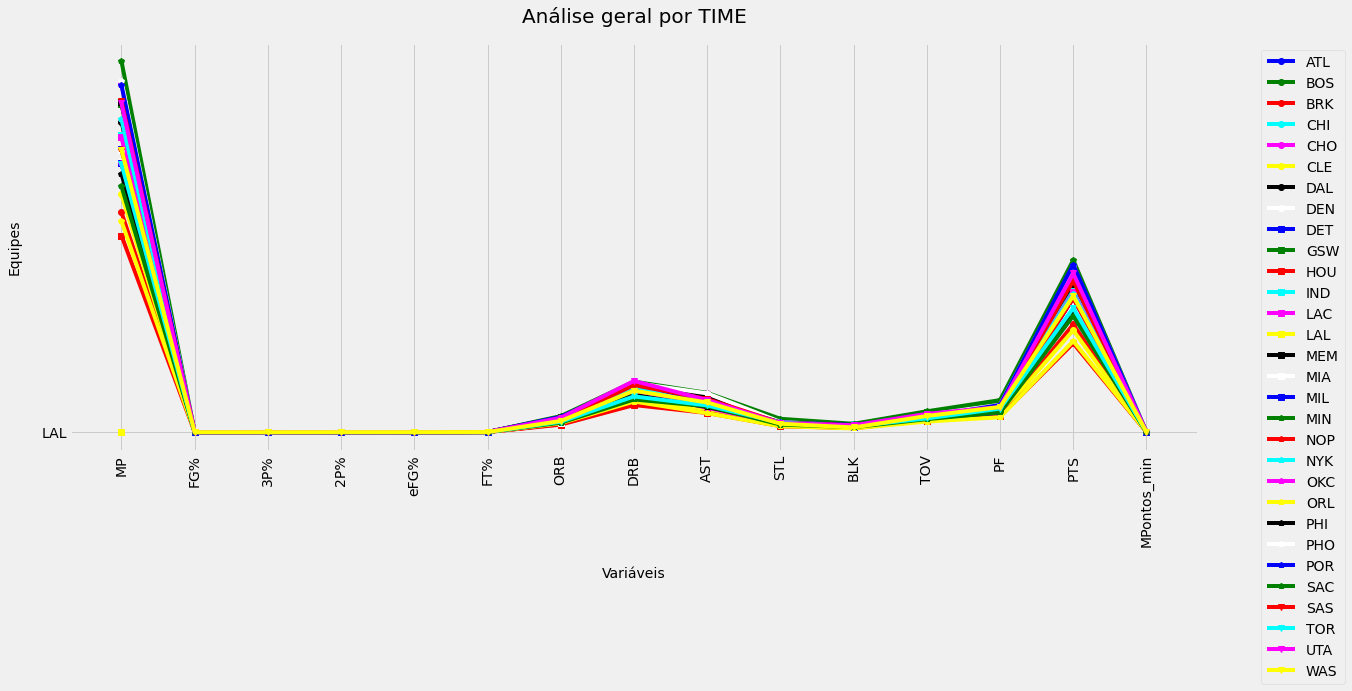

In [54]:
fig, ax = plt.subplots(figsize = (18, 7))

ax.plot('ATL', data = df_tm, marker = 'o', color = 'blue')
ax.plot('BOS', data = df_tm, marker = 'o', color = 'green')
ax.plot('BRK', data = df_tm, marker = 'o', color = 'red')
ax.plot('CHI', data = df_tm, marker = 'o', color = 'cyan')
ax.plot('CHO', data = df_tm, marker = 'o', color = 'magenta')
ax.plot('CLE', data = df_tm, marker = 'o', color = 'yellow')
ax.plot('DAL', data = df_tm, marker = 'o', color = 'black')
ax.plot('DEN', data = df_tm, marker = 'o', color = 'white')
ax.plot('DET', data = df_tm, marker = 's', color = 'blue')
ax.plot('GSW', data = df_tm, marker = 's', color = 'green')
ax.plot('HOU', data = df_tm, marker = 's', color = 'red')
ax.plot('IND', data = df_tm, marker = 's', color = 'cyan')
ax.plot('LAC', data = df_tm, marker = 's', color = 'magenta')
ax.plot('LAL', data = df, marker = 's', color = 'yellow')
ax.plot('MEM', data = df_tm, marker = 's', color = 'black')
ax.plot('MIA', data = df_tm, marker = 's', color = 'white')
ax.plot('MIL', data = df_tm, marker = 's', color = 'blue')
ax.plot('MIN', data = df_tm, marker = 'p', color = 'green')
ax.plot('NOP', data = df_tm, marker = 'p', color = 'red')
ax.plot('NYK', data = df_tm, marker = 'p', color = 'cyan')
ax.plot('OKC', data = df_tm, marker = 'p', color = 'magenta')
ax.plot('ORL', data = df_tm, marker = 'p', color = 'yellow')
ax.plot('PHI', data = df_tm, marker = 'p', color = 'black')
ax.plot('PHO', data = df_tm, marker = 'p', color = 'white')
ax.plot('POR', data = df_tm, marker = 'p', color = 'blue')
ax.plot('SAC', data = df_tm, marker = 'p', color = 'green')
ax.plot('SAS', data = df_tm, marker = 'v', color = 'red')
ax.plot('TOR', data = df_tm, marker = 'v', color = 'cyan')
ax.plot('UTA', data = df_tm, marker = 'v', color = 'magenta')
ax.plot('WAS', data = df_tm, marker = 'v', color = 'yellow')


ax.set_xlabel('Variáveis', fontsize = 14, labelpad = 20)
ax.set_ylabel('Equipes', fontsize = 14, labelpad = 20)
ax.set_xticks(df_tm.index)
ax.set_xticklabels(df_tm.index, rotation = 90)
ax.set_title("Análise geral por TIME", fontsize = 20, pad = 20)
ax.legend(loc = 'upper left', bbox_to_anchor = (1.05, 1), frameon = True)

plt.axis('tight');

DADOS POR POSIÇÃO

Copiando e ajustando o data set

In [55]:
df_ps = df_bk.copy()
numeric_cols = df_ps.columns.drop(['Player','Pos','Tm', 'Age'])
df_ps[numeric_cols] = df_ps[numeric_cols].apply(pd.to_numeric)
df_ps.drop(df_ps.loc[df_ps['Tm']=='TOT'].index, inplace=True)
df_ps = df_ps.drop(columns=['Rk', 'Player', 'Age', 'Tm', 'FG','FGA','3P','3PA','2P','2PA','FT','FTA', 'TRB', 'G', 'GS'])
df_ps.fillna(0, inplace = True)
df_ps.head()

,Pos,MP,FG%,3P%,2P%,eFG%,FT%,ORB,DRB,AST,STL,BLK,TOV,PF,PTS
0,PF,737,0.544,0.00,0.546,0.544,0.509,73,135,29,20,28,43,91,304
1,PG,18,0.125,0.00,0.167,0.125,0.000,0,3,2,0,0,0,1,2
2,C,1605,0.614,0.00,0.620,0.614,0.444,213,301,111,54,38,78,113,438
3,C,2143,0.570,0.25,0.573,0.571,0.799,142,431,346,75,66,169,145,1197
5,C,544,0.464,0.36,0.509,0.518,0.838,17,77,36,8,18,20,36,288


Distrubuição dos posições pelo dataset

In [56]:
pos = df_ps['Pos'].value_counts()
pos.head(5)

SG    147
PF    132
C     120
PG    117
SF    110
Name: Pos, dtype: int64

Ajustando posições como index

In [57]:
df_ps = df_ps.set_index('Pos')
df_ps.head()

,MP,FG%,3P%,2P%,eFG%,FT%,ORB,DRB,AST,STL,BLK,TOV,PF,PTS
Pos,,,,,,,,,,,,,,
PF,737,0.544,0.00,0.546,0.544,0.509,73,135,29,20,28,43,91,304
PG,18,0.125,0.00,0.167,0.125,0.000,0,3,2,0,0,0,1,2
C,1605,0.614,0.00,0.620,0.614,0.444,213,301,111,54,38,78,113,438
C,2143,0.570,0.25,0.573,0.571,0.799,142,431,346,75,66,169,145,1197
C,544,0.464,0.36,0.509,0.518,0.838,17,77,36,8,18,20,36,288


Juntando posições iguals numa mesma observação


In [58]:
df_ps = df_ps.groupby(level = 0).mean().round(3)
df_ps.head()

,MP,FG%,3P%,2P%,eFG%,FT%,ORB,DRB,AST,STL,BLK,TOV,PF,PTS
Pos,,,,,,,,,,,,,,
C,756.725,0.522,0.206,0.556,0.550,0.664,69.792,162.025,52.733,19.842,34.375,40.275,77.550,351.942
PF,803.159,0.440,0.284,0.499,0.505,0.681,36.250,129.576,68.015,23.970,17.689,41.159,66.947,350.856
PG,902.590,0.411,0.334,0.459,0.479,0.759,19.966,102.214,158.556,33.769,9.282,63.581,62.051,456.761
SF,819.300,0.424,0.320,0.501,0.502,0.710,26.855,110.591,66.982,26.000,13.045,38.891,61.773,358.136
SG,877.197,0.415,0.335,0.495,0.501,0.766,18.925,93.762,84.027,27.211,10.503,44.796,64.429,413.163


Qual posição pontuou mais e menos?



In [59]:
df_ps[['MP', 'PTS']].sort_values('PTS', ascending=False)

,MP,PTS
Pos,,
PG,902.590,456.761
SG,877.197,413.163
SF,819.300,358.136
C,756.725,351.942
PF,803.159,350.856


Qual posição mais minutos jogou? E menos?


In [60]:
df_ps[['MP', 'PTS']].sort_values('MP', ascending=False)

,MP,PTS
Pos,,
PG,902.590,456.761
SG,877.197,413.163
SF,819.300,358.136
PF,803.159,350.856
C,756.725,351.942


Criando nova coluna e de média pontos por minutos jogados


In [61]:
df_ps['MPontos_min'] = df_ps['PTS']/df_ps['MP']

Qual posição mais e menos pontuou em Pontos/MP?


In [62]:
df_ps[['MPontos_min']].sort_values('MPontos_min', ascending=False)

,MPontos_min
Pos,
PG,0.506056
SG,0.471004
C,0.465086
SF,0.437124
PF,0.436845


Platando algumas informações sobre posições

In [63]:
# tranpondo
df_ps = df_ps.T

In [64]:
plt.style.use(['fivethirtyeight'])
sns.set_palette('hls')

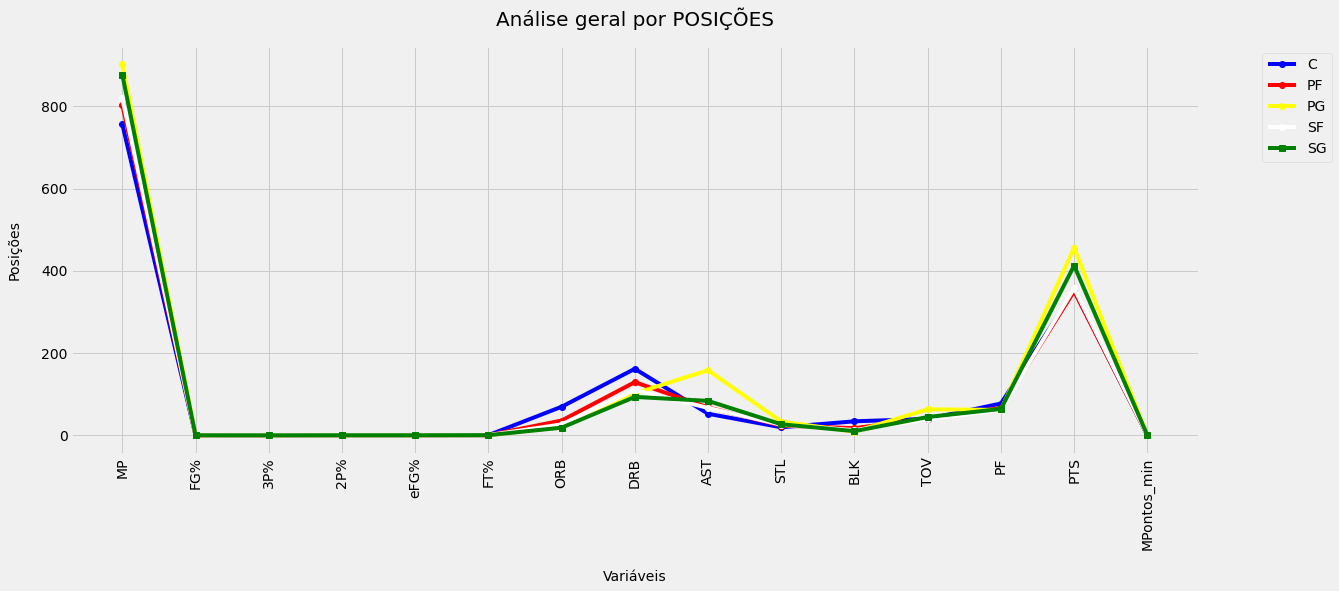

In [65]:
fig, ax = plt.subplots(figsize = (18, 7))

ax.plot('C', data = df_ps, marker = 'o', color = 'blue')
ax.plot('PF', data = df_ps, marker = 'o', color = 'red')
ax.plot('PG', data = df_ps, marker = 'o', color = 'yellow')
ax.plot('SF', data = df_ps, marker = 'o', color = 'white')
ax.plot('SG', data = df_ps, marker = 's', color = 'green')

ax.set_xlabel('Variáveis', fontsize = 14, labelpad = 20)
ax.set_ylabel('Posições', fontsize = 14, labelpad = 20)
ax.set_xticks(df_ps.index)
ax.set_xticklabels(df_ps.index, rotation = 90)
ax.set_title("Análise geral por POSIÇÕES", fontsize = 20, pad = 20)
ax.legend(loc = 'upper left', bbox_to_anchor = (1.05, 1), frameon = True)

plt.axis('tight');

## Tratando os dados

Removendo as estatísticas do jogador por cada time

In [66]:
df = df.drop_duplicates(subset=['Rk'])
df = df.drop(columns=['Rk'])
df.head(10)

,Player,Pos,Age,Tm,G,GS,MP,FG%,3P%,2P%,eFG%,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,PF,21,MIA,61,4,737,0.544,0.000,0.546,0.544,0.509,73,135,208,29,20,28,43,91,304
1,Jaylen Adams,PG,24,MIL,7,0,18,0.125,0.000,0.167,0.125,0.000,0,3,3,2,0,0,0,1,2
2,Steven Adams,C,27,NOP,58,58,1605,0.614,0.000,0.620,0.614,0.444,213,301,514,111,54,38,78,113,438
3,Bam Adebayo,C,23,MIA,64,64,2143,0.570,0.250,0.573,0.571,0.799,142,431,573,346,75,66,169,145,1197
5,LaMarcus Aldridge,C,35,SAS,21,18,544,0.464,0.360,0.509,0.518,0.838,17,77,94,36,8,18,20,36,288
7,Ty-Shon Alexander,SG,22,PHO,15,0,47,0.250,0.222,0.333,0.333,0.500,2,8,10,6,0,1,3,2,9
8,Nickeil Alexander-Walker,SG,22,NOP,46,13,1007,0.419,0.347,0.485,0.502,0.727,13,131,144,102,47,22,69,88,508
9,Grayson Allen,SG,25,MEM,50,38,1259,0.418,0.391,0.471,0.547,0.868,19,141,160,108,46,8,48,71,532
11,Jarrett Allen,C,22,BRK,12,5,320,0.677,0.000,0.677,0.677,0.754,38,87,125,20,7,19,22,21,134
14,Al-Farouq Aminu,PF,30,ORL,17,14,367,0.404,0.226,0.500,0.444,0.824,20,71,91,29,17,9,25,22,93


## Análise estatística

In [67]:

df.describe()

,Age,G,GS,MP,FG%,3P%,2P%,eFG%,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000
mean,25.555556,39.877778,18.961111,905.912963,0.443517,0.297478,0.504859,0.510319,0.717296,36.629630,128.940741,165.570370,93.142593,28.344444,18.014815,49.551852,72.203704,421.888889
std,4.108305,21.576714,22.915436,706.193821,0.111346,0.142323,0.139206,0.113277,0.213445,44.152962,121.250535,158.259259,112.247871,25.060666,22.839518,50.919296,55.035215,416.506563
min,19.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,21.000000,1.000000,237.500000,0.400000,0.250000,0.459000,0.479000,0.658750,7.000000,30.750000,40.750000,14.000000,7.000000,3.000000,10.000000,22.000000,87.750000
50%,25.000000,42.000000,7.000000,835.500000,0.441000,0.335500,0.512000,0.524000,0.770000,23.000000,100.000000,128.000000,58.000000,22.500000,10.000000,34.000000,64.000000,293.500000
75%,28.000000,60.000000,34.250000,1461.750000,0.497000,0.388000,0.575500,0.566500,0.843000,47.000000,195.000000,247.250000,120.250000,44.000000,24.000000,69.250000,115.000000,653.250000
max,40.000000,72.000000,72.000000,2667.000000,1.000000,1.000000,1.000000,1.000000,1.000000,297.000000,720.000000,960.000000,763.000000,128.000000,190.000000,312.000000,237.000000,2015.000000


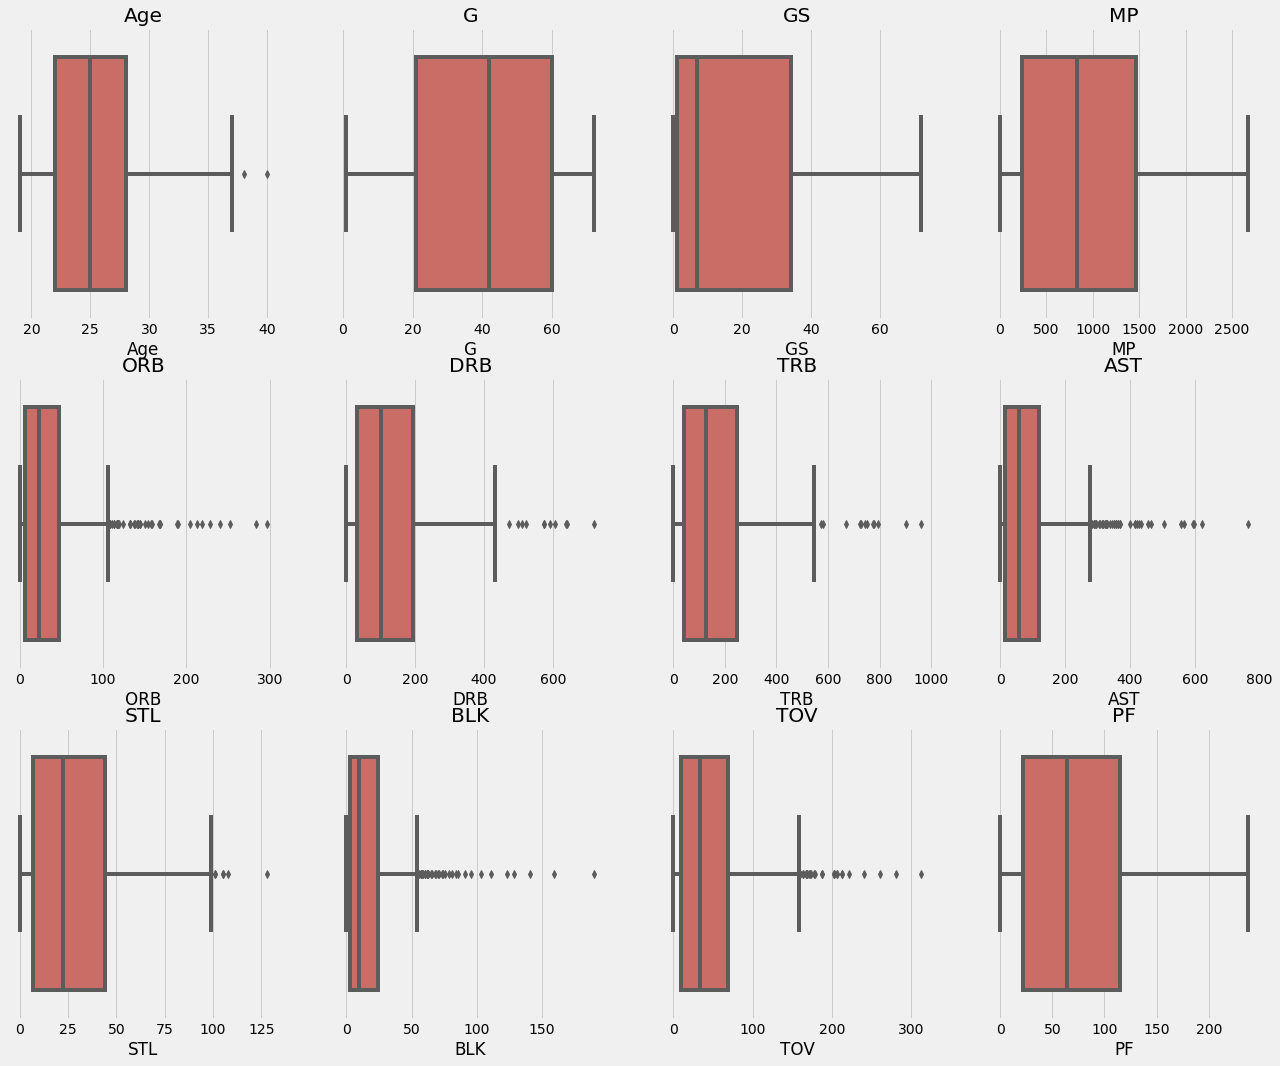

In [68]:
plt.figure(figsize=(20,17))
plt.subplot(3,4,1)
sns.boxplot(x=df['Age'])
plt.title("Age")

plt.subplot(3,4,2)
sns.boxplot(x=df['G'])
plt.title("G")


plt.subplot(3,4,3)
sns.boxplot(x=df['GS'])
plt.title("GS")


plt.subplot(3,4,4)
sns.boxplot(x=df['MP'])
plt.title("MP");

plt.subplot(3,4,5)
sns.boxplot(x=df['ORB'])
plt.title("ORB");

plt.subplot(3,4,6)
sns.boxplot(x=df['DRB'])
plt.title("DRB");

plt.subplot(3,4,7)
sns.boxplot(x=df['TRB'])
plt.title("TRB");

plt.subplot(3,4,8)
sns.boxplot(x=df['AST'])
plt.title("AST");

plt.subplot(3,4,9)
sns.boxplot(x=df['STL'])
plt.title("STL");

plt.subplot(3,4,10)
sns.boxplot(x=df['BLK'])
plt.title("BLK");

plt.subplot(3,4,11)
sns.boxplot(x=df['TOV'])
plt.title("TOV");

plt.subplot(3,4,12)
sns.boxplot(x=df['PF'])
plt.title("PF");

Parece que há possiveis outliers, mas ao analisarmos as metricas pode ser simplesmente que jogadores muito acima da média.

## Correlação

Conferir a correlação dos dados:

In [69]:
corr_matrix = df.corr()
corr_matrix["PTS"].sort_values(ascending=False)

PTS     1.000000
TOV     0.907969
MP      0.906998
GS      0.822094
AST     0.802120
DRB     0.794872
STL     0.770382
PF      0.769177
TRB     0.746352
G       0.727611
ORB     0.492343
BLK     0.443889
FT%     0.327738
3P%     0.322926
eFG%    0.296845
FG%     0.259064
2P%     0.164997
Age     0.114114
Name: PTS, dtype: float64

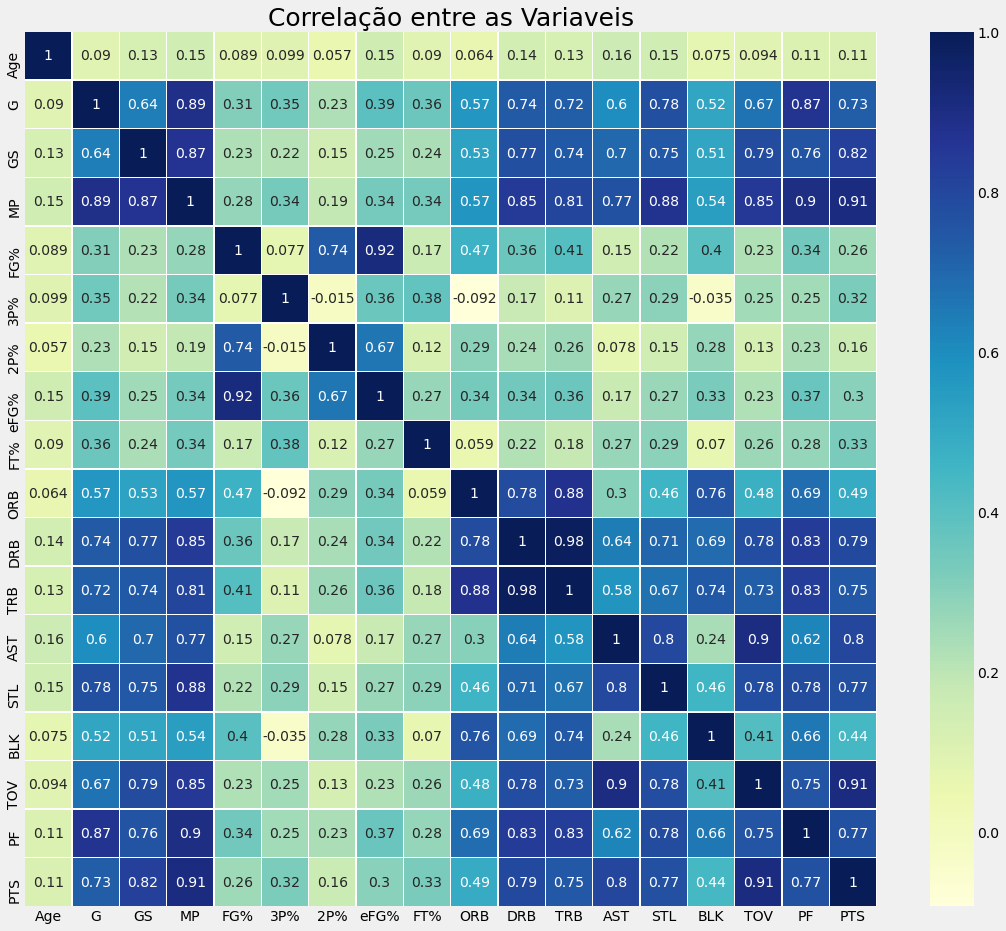

In [70]:
plt.rcParams['figure.figsize'] = (17, 15) 
sns.heatmap(df.corr(), annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Correlação entre as Variaveis', fontsize = 25)
plt.show()

Podemos observar muitas variaveis com alta correlação. Dessa forma, vamos fazer algumas analises mais detalhadas:

* ORB, DRB E TRB.
* G, GS E MP.

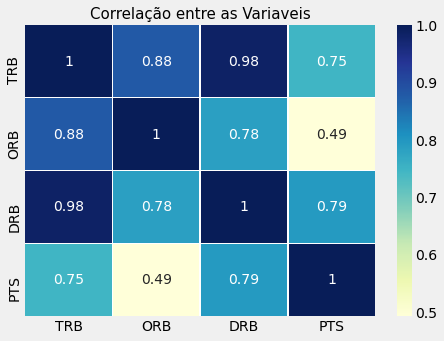

In [71]:
atributos = ["TRB", "ORB","DRB",'PTS']
plt.rcParams['figure.figsize'] = (7, 5) 
sns.heatmap(df[atributos].corr(), annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Correlação entre as Variaveis', fontsize = 15)
plt.show()

Podemos ver a alta correlação entre 'ORB', 'DRB' e 'TRB'. Ao analisarmos a tabela, vimos que 'TRB' é a soma das outras duas. Dessa forma, vamos remover 'TRB' e manter as outras duas features que já representam o fenômeno.

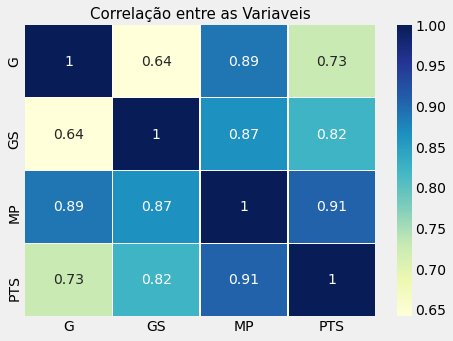

In [72]:
atributos = ["G", "GS","MP",'PTS']
plt.rcParams['figure.figsize'] = (7, 5) 
sns.heatmap(df[atributos].corr(), annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Correlação entre as Variaveis', fontsize = 15)
plt.show()

Podemos ver que MP possui uma alta correlação com 'G' e 'GS (acima de 0.86), além de possuir a maior correlação com 'PTS'(nossa coluna target) entre os 3. No entanto, apesar de serem metricas parecidas, a interpretação dessas metricas para o modelo pode ser diferente. Dessa forma, no primeiro momento temos que utilizar todas as metricas no modelo.

## Dispersão dos dados

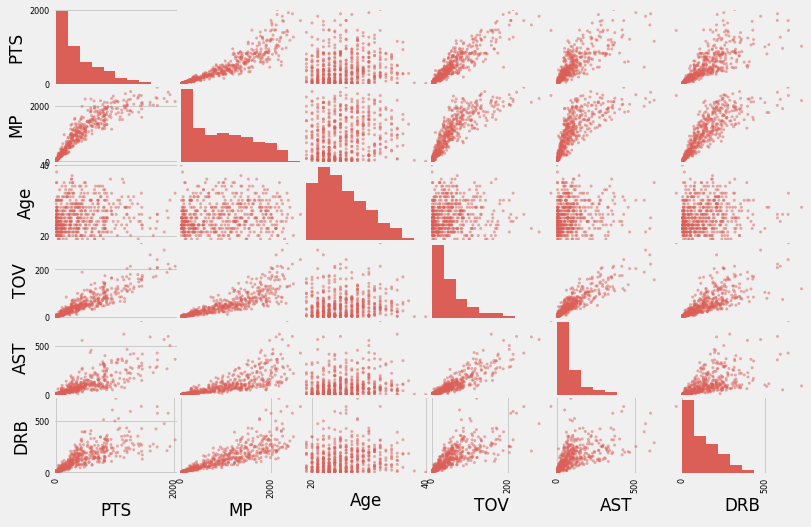

In [73]:
from pandas.plotting import scatter_matrix 
#attributes = ["Age", "G", "GS", "MP",	"FG%", "3P%", "2P%", "eFG%", "FT%", "ORB", "DRB", "TRB", "AST", "STL", "BLK", "TOV", "PF", "PTS"]
attributes = ["PTS", "MP", "Age", "TOV", "AST", "DRB"]
scatter_matrix(df[attributes], figsize=(12,8));

###Jogos x Pontos

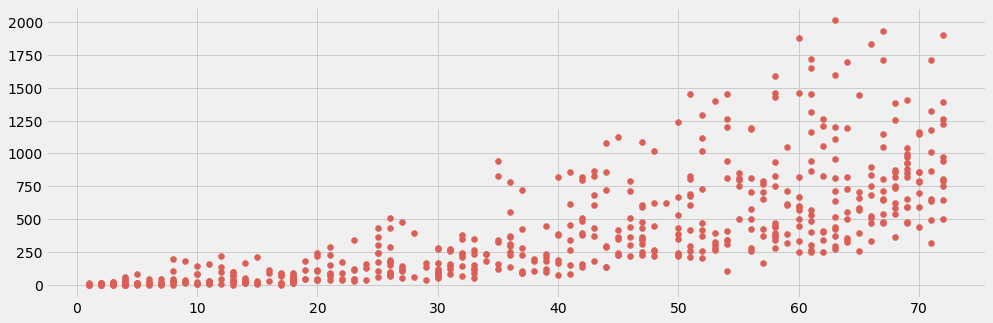

In [74]:
plt.figure(figsize=(15,5))
plt.scatter(x=df['G'], y=df['PTS'])

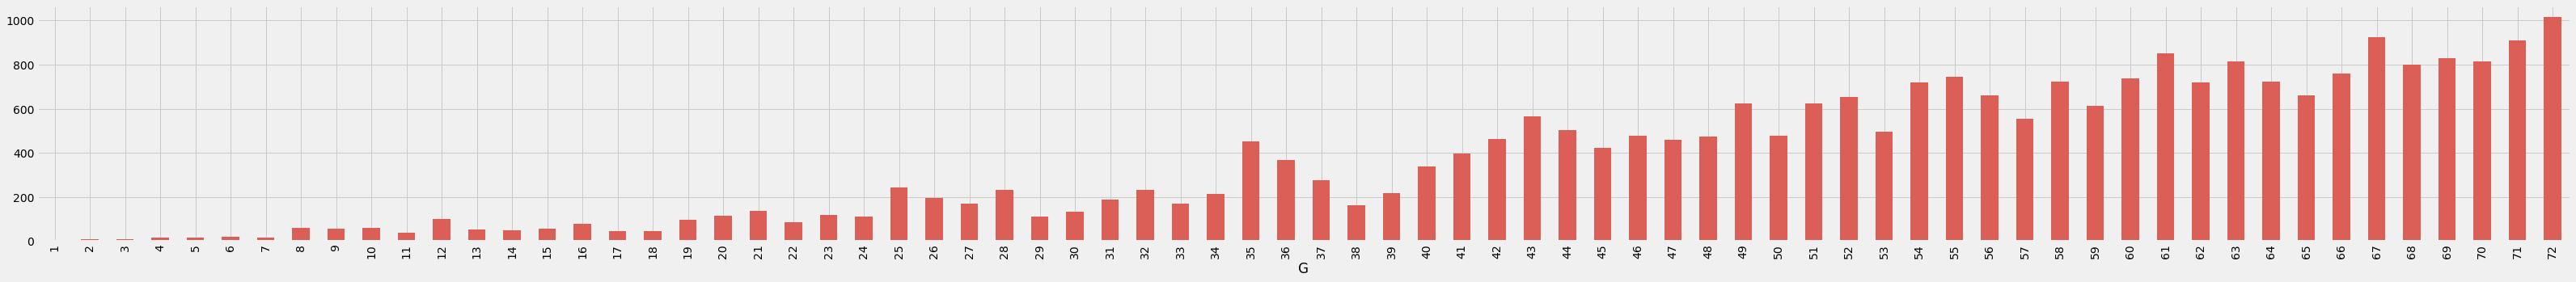

In [75]:
plt.figure(figsize=(50,5))
df.groupby('G')['PTS'].mean().plot.bar()
plt.show();

Observa-se que possui alta correlação, uma vez que quanto maior a quantidade de jogos maior a quantidade de pontos. 

###Games Start x Pontos

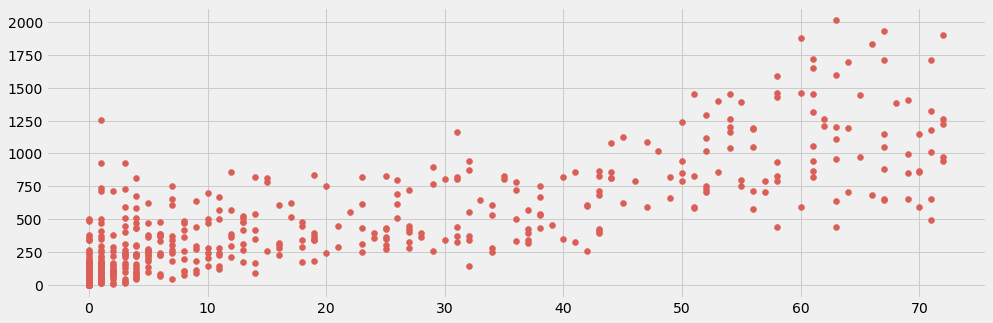

In [76]:
plt.figure(figsize=(15,5))
plt.scatter(x=df['GS'], y=df['PTS'])

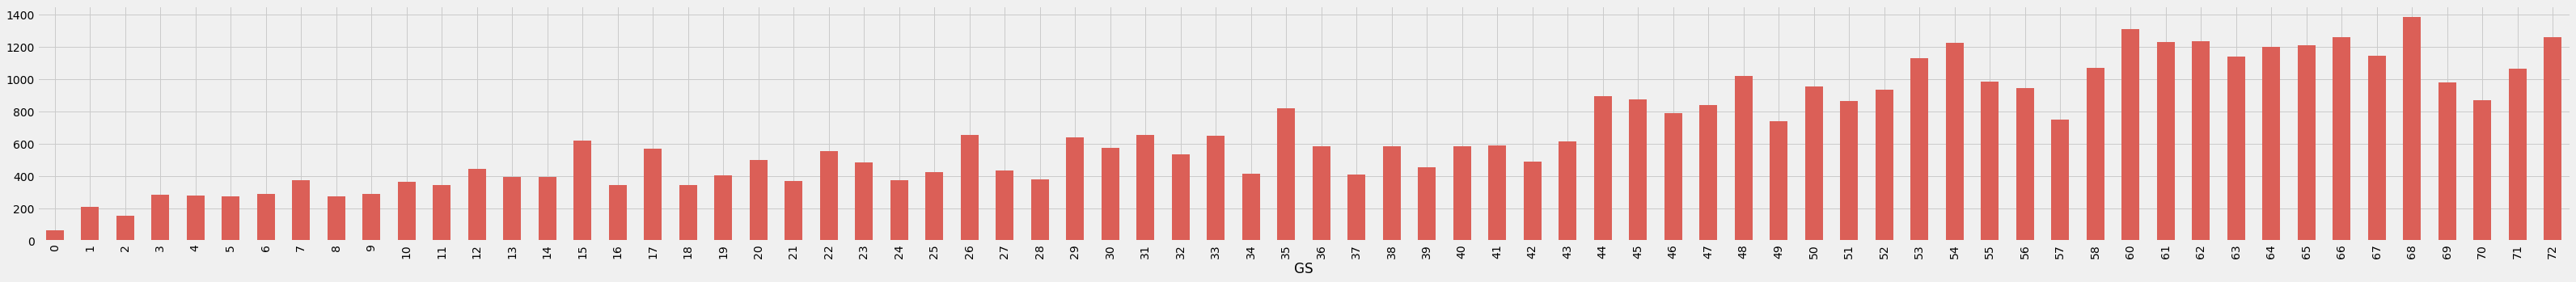

In [77]:
plt.figure(figsize=(50,5))
df.groupby('GS')['PTS'].mean().plot.bar()
plt.show();

Conclusão GS:

###Turnover x Pontos

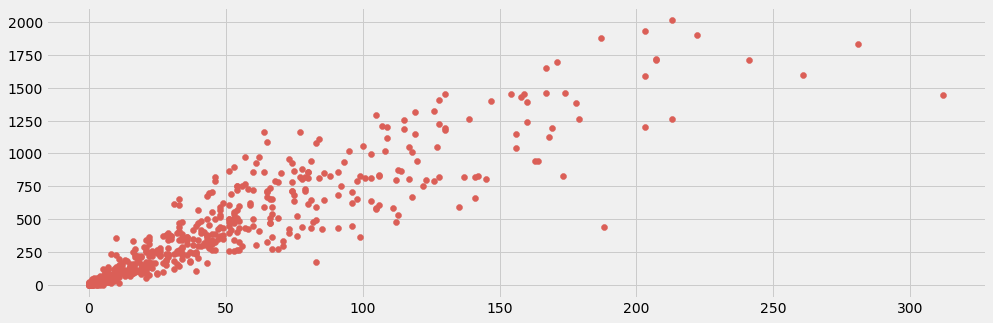

In [78]:
plt.figure(figsize=(15,5))
plt.scatter(x=df['TOV'], y=df['PTS'])

Observa-se que os valores possuem crescimento linear.

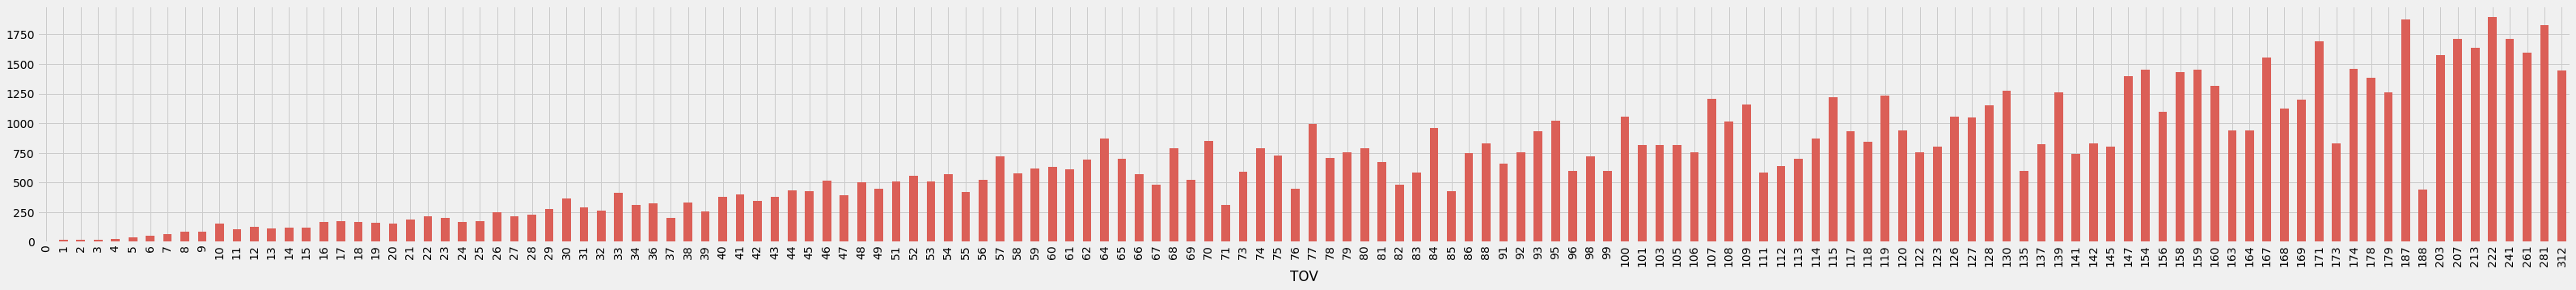

In [79]:
plt.figure(figsize=(50,5))
df.groupby('TOV')['PTS'].mean().plot.bar()
plt.show();

###Numero de assistencias x Pontos

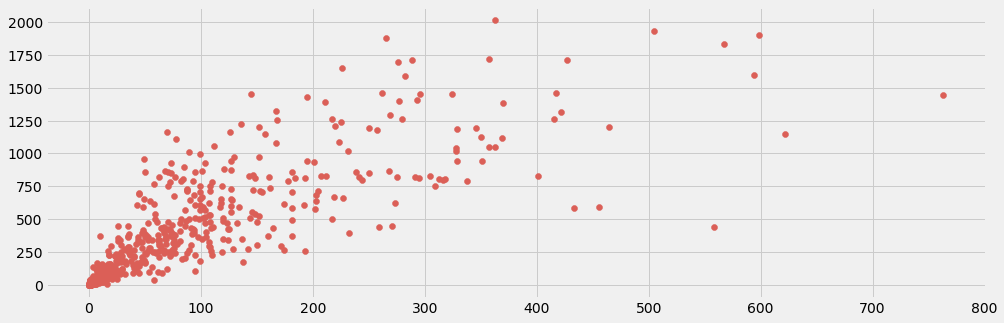

In [80]:
plt.figure(figsize=(15,5))
plt.scatter(x=df['AST'], y=df['PTS'])

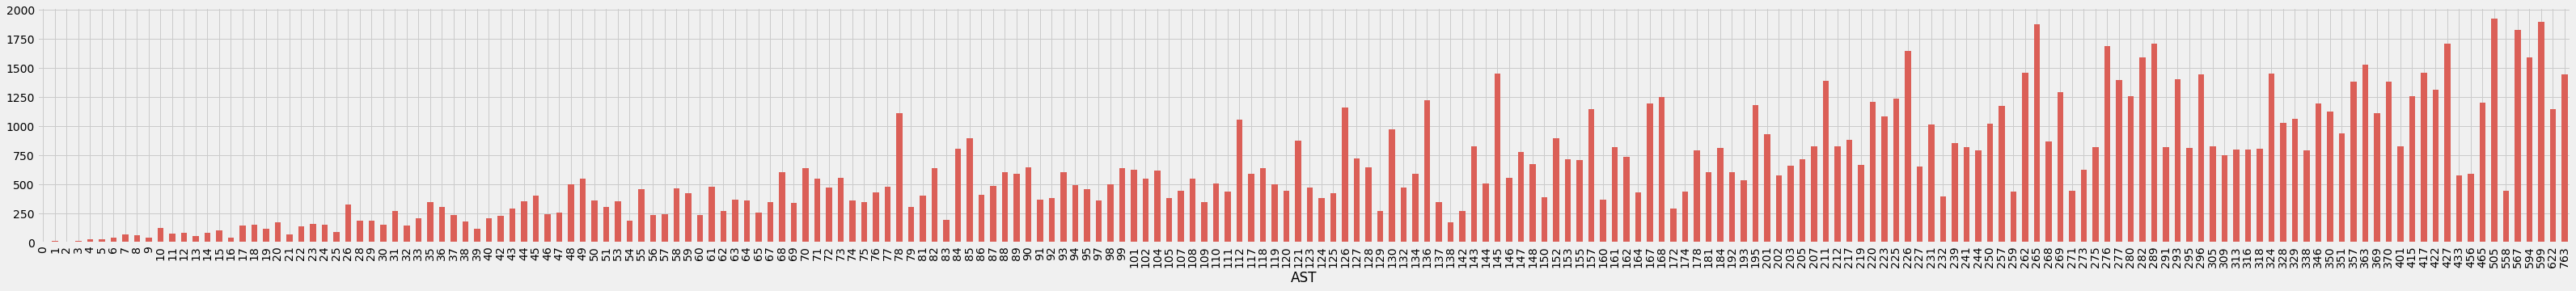

In [81]:
plt.figure(figsize=(50,5))
df.groupby('AST')['PTS'].mean().plot.bar()
plt.show();

### Minutos jogados x Pontos

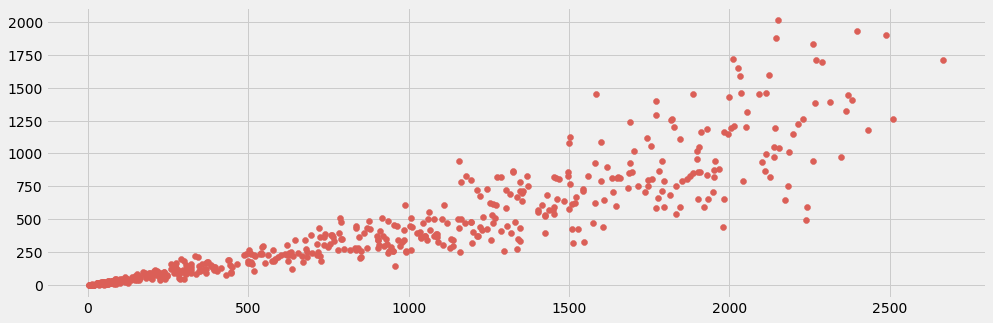

In [82]:
plt.figure(figsize=(15,5))
plt.scatter(x=df['MP'], y=df['PTS'])


Podemos ver um crescimento linear entre essas duas variaveis.

## Padronizando a variável Posição

Algumas posições tendem a marcar mais pontos que outras. Por isso isso vamos codificá-las pela ordem de qual tende a marcar mais pontos.

In [83]:
df.groupby('Pos')['PTS'].mean()

Pos
C     391.224490
PF    380.241379
PG    488.339806
SF    399.042105
SG    446.593750
Name: PTS, dtype: float64

In [84]:
df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG%,3P%,2P%,eFG%,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,PF,21,MIA,61,4,737,0.544,0.00,0.546,0.544,0.509,73,135,208,29,20,28,43,91,304
1,Jaylen Adams,PG,24,MIL,7,0,18,0.125,0.00,0.167,0.125,0.000,0,3,3,2,0,0,0,1,2
2,Steven Adams,C,27,NOP,58,58,1605,0.614,0.00,0.620,0.614,0.444,213,301,514,111,54,38,78,113,438
3,Bam Adebayo,C,23,MIA,64,64,2143,0.570,0.25,0.573,0.571,0.799,142,431,573,346,75,66,169,145,1197
5,LaMarcus Aldridge,C,35,SAS,21,18,544,0.464,0.36,0.509,0.518,0.838,17,77,94,36,8,18,20,36,288


In [85]:
encoder = OrdinalEncoder([['PF', 'SF', 'C', 'SG', 'PG']])
df[['Pos']] = encoder.fit_transform(df[['Pos']])

In [86]:
df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG%,3P%,2P%,eFG%,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,0.0,21,MIA,61,4,737,0.544,0.00,0.546,0.544,0.509,73,135,208,29,20,28,43,91,304
1,Jaylen Adams,4.0,24,MIL,7,0,18,0.125,0.00,0.167,0.125,0.000,0,3,3,2,0,0,0,1,2
2,Steven Adams,2.0,27,NOP,58,58,1605,0.614,0.00,0.620,0.614,0.444,213,301,514,111,54,38,78,113,438
3,Bam Adebayo,2.0,23,MIA,64,64,2143,0.570,0.25,0.573,0.571,0.799,142,431,573,346,75,66,169,145,1197
5,LaMarcus Aldridge,2.0,35,SAS,21,18,544,0.464,0.36,0.509,0.518,0.838,17,77,94,36,8,18,20,36,288


## Removendo a coluna TRB e ajustando Player como index

In [87]:
df.drop(['TRB'], axis=1)
df = df.set_index('Player')
df.head()

,Pos,Age,Tm,G,GS,MP,FG%,3P%,2P%,eFG%,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Player,,,,,,,,,,,,,,,,,,,,
Precious Achiuwa,0.0,21,MIA,61,4,737,0.544,0.00,0.546,0.544,0.509,73,135,208,29,20,28,43,91,304
Jaylen Adams,4.0,24,MIL,7,0,18,0.125,0.00,0.167,0.125,0.000,0,3,3,2,0,0,0,1,2
Steven Adams,2.0,27,NOP,58,58,1605,0.614,0.00,0.620,0.614,0.444,213,301,514,111,54,38,78,113,438
Bam Adebayo,2.0,23,MIA,64,64,2143,0.570,0.25,0.573,0.571,0.799,142,431,573,346,75,66,169,145,1197
LaMarcus Aldridge,2.0,35,SAS,21,18,544,0.464,0.36,0.509,0.518,0.838,17,77,94,36,8,18,20,36,288


## Padronizando a variável time

In [88]:
df.groupby('Tm')['PTS'].mean()

Tm
ATL    467.470588
BOS    455.647059
BRK    305.333333
CHI    415.235294
CHO    483.125000
CLE    323.894737
DAL    467.529412
DEN    457.117647
DET    407.411765
GSW    481.529412
HOU    289.409091
IND    398.736842
LAC    465.352941
LAL    464.125000
MEM    453.166667
MIA    404.105263
MIL    468.611111
MIN    504.562500
NOP    421.000000
NYK    422.000000
OKC    352.950000
ORL    308.476190
PHI    424.736842
PHO    504.437500
POR    493.750000
SAC    406.500000
SAS    465.470588
TOR    391.736842
UTA    489.058824
WAS    425.777778
Name: PTS, dtype: float64

In [89]:
encoder = OrdinalEncoder([['ATL', 'BOS', 'BRK', 'CHI', 'CHO', 'CLE', 'DAL', 'DEN',
                           'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA',
                           'MIL', 'MIN', 'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHO', 
                           'POR', 'SAC', 'SAS', 'TOR', 'UTA', 'WAS']])
df[['Tm']] = encoder.fit_transform(df[['Tm']])

In [90]:
df.head()

,Pos,Age,Tm,G,GS,MP,FG%,3P%,2P%,eFG%,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Player,,,,,,,,,,,,,,,,,,,,
Precious Achiuwa,0.0,21,15.0,61,4,737,0.544,0.00,0.546,0.544,0.509,73,135,208,29,20,28,43,91,304
Jaylen Adams,4.0,24,16.0,7,0,18,0.125,0.00,0.167,0.125,0.000,0,3,3,2,0,0,0,1,2
Steven Adams,2.0,27,18.0,58,58,1605,0.614,0.00,0.620,0.614,0.444,213,301,514,111,54,38,78,113,438
Bam Adebayo,2.0,23,15.0,64,64,2143,0.570,0.25,0.573,0.571,0.799,142,431,573,346,75,66,169,145,1197
LaMarcus Aldridge,2.0,35,26.0,21,18,544,0.464,0.36,0.509,0.518,0.838,17,77,94,36,8,18,20,36,288


## Separar treino e teste

In [92]:
X = df.drop(['PTS'], 1)
y = df['PTS']

X_train, X_test, y_train, y_test = train_test_split(X,y)



In [93]:
# Dimensões dos conjuntos de treinamento e teste

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(405, 19)
(135, 19)
(405,)
(135,)


In [94]:
# frações das classes nos dados de treinamento e teste
np.mean(y_train)

425.5358024691358

In [95]:
np.mean(y_test)

410.94814814814816

In [96]:
X_train.describe()

,Pos,Age,Tm,G,GS,MP,FG%,3P%,2P%,eFG%,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF
count,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000
mean,2.004938,25.637037,14.385185,39.772840,18.933333,904.738272,0.443733,0.295094,0.503948,0.509526,0.720472,36.056790,127.681481,163.738272,94.451852,27.733333,17.214815,50.232099,71.120988
std,1.429871,4.176088,8.666241,21.341466,22.820175,706.618965,0.112839,0.147001,0.138458,0.114578,0.204219,43.576372,117.527160,153.539593,114.385036,24.479088,21.173629,51.802705,54.987016
min,0.000000,19.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,22.000000,7.000000,21.000000,1.000000,241.000000,0.396000,0.250000,0.458000,0.476000,0.655000,7.000000,31.000000,42.000000,14.000000,7.000000,3.000000,10.000000,22.000000
50%,2.000000,25.000000,14.000000,42.000000,7.000000,832.000000,0.442000,0.335000,0.512000,0.523000,0.769000,22.000000,100.000000,126.000000,57.000000,22.000000,10.000000,34.000000,62.000000
75%,3.000000,28.000000,22.000000,59.000000,35.000000,1464.000000,0.498000,0.389000,0.577000,0.568000,0.840000,46.000000,199.000000,247.000000,127.000000,44.000000,23.000000,73.000000,114.000000
max,4.000000,40.000000,29.000000,72.000000,72.000000,2511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,297.000000,641.000000,903.000000,763.000000,128.000000,141.000000,312.000000,237.000000


In [97]:
X_train.head()

,Pos,Age,Tm,G,GS,MP,FG%,3P%,2P%,eFG%,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF
Player,,,,,,,,,,,,,,,,,,,
Romeo Langford,3.0,21,1.0,18,4,283,0.356,0.278,0.390,0.398,0.750,12,23,35,13,6,5,10,24
Raul Neto,4.0,28,29.0,64,22,1403,0.468,0.390,0.512,0.539,0.882,28,128,156,146,73,6,53,109
Mason Plumlee,2.0,30,8.0,56,56,1499,0.614,0.000,0.626,0.614,0.669,145,374,519,202,43,50,105,186
Terrance Ferguson,3.0,22,22.0,13,0,49,0.143,0.000,0.500,0.143,0.000,0,1,1,2,1,0,4,7
Vincent Poirier,2.0,27,22.0,10,0,39,0.250,0.000,0.273,0.250,0.333,6,8,14,2,0,3,4,8


In [98]:
X_test.describe()

,Pos,Age,Tm,G,GS,MP,FG%,3P%,2P%,eFG%,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF
count,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.00000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,2.037037,25.311111,14.637037,40.192593,19.044444,909.437037,0.442867,0.304630,0.507593,0.512696,0.70777,38.348148,132.718519,171.066667,89.214815,30.177778,20.414815,47.511111,75.451852
std,1.426861,3.902672,8.642664,22.345822,23.284377,707.533625,0.107147,0.127505,0.141914,0.109662,0.23957,45.962723,132.184271,172.130903,105.889578,26.740842,27.181915,48.300500,55.256622
min,0.000000,19.000000,0.000000,1.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,22.500000,7.000000,19.000000,1.000000,228.000000,0.405000,0.276000,0.459000,0.482000,0.68850,6.000000,29.000000,36.000000,14.000000,7.500000,4.000000,10.500000,24.500000
50%,2.000000,24.000000,15.000000,46.000000,6.000000,869.000000,0.436000,0.339000,0.517000,0.526000,0.77800,25.000000,100.000000,129.000000,60.000000,25.000000,12.000000,37.000000,74.000000
75%,3.000000,28.000000,21.500000,60.500000,31.500000,1446.000000,0.487500,0.381500,0.574000,0.561500,0.84350,51.500000,192.500000,247.000000,110.500000,45.500000,24.000000,57.000000,115.500000
max,4.000000,35.000000,29.000000,72.000000,72.000000,2667.000000,0.769000,0.500000,1.000000,0.846000,1.00000,253.000000,720.000000,960.000000,599.000000,108.000000,190.000000,241.000000,225.000000


In [99]:
X_test.head()

,Pos,Age,Tm,G,GS,MP,FG%,3P%,2P%,eFG%,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF
Player,,,,,,,,,,,,,,,,,,,
Lauri Markkanen,0.0,23,3.0,51,26,1317,0.480,0.402,0.582,0.594,0.826,35,233,268,45,26,15,52,75
Frank Ntilikina,4.0,22,19.0,33,4,322,0.367,0.479,0.194,0.513,0.444,6,25,31,19,18,4,11,45
Darius Garland,4.0,21,5.0,54,50,1790,0.451,0.395,0.479,0.517,0.848,23,106,129,329,66,6,164,110
Nate Hinton,3.0,21,6.0,21,0,93,0.357,0.211,0.478,0.405,0.700,1,8,9,8,7,2,5,8
Jordan McLaughlin,4.0,24,17.0,51,2,938,0.413,0.359,0.447,0.481,0.767,21,87,108,193,51,6,51,44


## Aplicando a reescala

In [100]:
#numeric_cols = ['Age', 'MP', 'ORB', 'DRB','AST', 'STL', 'BLK', 'TOV', 'PF']
numeric_cols = ['Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG%', '3P%', '2P%', 'eFG%', 'FT%', 'ORB', 'DRB', 'TRB',  'AST', 'STL', 'BLK', 'TOV', 'PF']
scaler = MinMaxScaler()

X_train_scale = X_train.copy()
X_test_scale = X_test.copy()

X_train_scale[numeric_cols] = scaler.fit_transform(X_train_scale[numeric_cols])
X_test_scale[numeric_cols] = scaler.transform(X_test_scale[numeric_cols])

In [101]:
X_train_scale.head()

,Pos,Age,Tm,G,GS,MP,FG%,3P%,2P%,eFG%,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF
Player,,,,,,,,,,,,,,,,,,,
Romeo Langford,0.75,0.095238,0.034483,0.239437,0.055556,0.111643,0.356,0.278,0.390,0.398,0.750,0.040404,0.035881,0.038760,0.017038,0.046875,0.035461,0.032051,0.101266
Raul Neto,1.00,0.428571,1.000000,0.887324,0.305556,0.558214,0.468,0.390,0.512,0.539,0.882,0.094276,0.199688,0.172757,0.191350,0.570312,0.042553,0.169872,0.459916
Mason Plumlee,0.50,0.523810,0.275862,0.774648,0.777778,0.596491,0.614,0.000,0.626,0.614,0.669,0.488215,0.583463,0.574751,0.264744,0.335938,0.354610,0.336538,0.784810
Terrance Ferguson,0.75,0.142857,0.758621,0.169014,0.000000,0.018341,0.143,0.000,0.500,0.143,0.000,0.000000,0.001560,0.001107,0.002621,0.007812,0.000000,0.012821,0.029536
Vincent Poirier,0.50,0.380952,0.758621,0.126761,0.000000,0.014354,0.250,0.000,0.273,0.250,0.333,0.020202,0.012480,0.015504,0.002621,0.000000,0.021277,0.012821,0.033755


## Regressão Linear


In [102]:
from sklearn.linear_model import LinearRegression

In [103]:
linear = LinearRegression()

In [104]:
linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [105]:
from sklearn.metrics import r2_score

In [108]:
r2_train = linear.score(X_train, y_train)
r2_test = linear.score(X_test, y_test)
print('R2 no set de treino: %.2f' % r2_train)
print('R2 no set de teste: %.2f' % r2_test)

R2 no set de treino: 0.92
R2 no set de teste: 0.91


In [109]:
linear.score(X_test, y_test)

0.9062334252143291

## Regressão Logística

In [111]:
#Importa a biblioteca
from sklearn.linear_model import LogisticRegression


In [112]:
#Assume que você tem X (previsor) e Y (alvo) para dados de treino e x_test(previsor) dos dados de teste
#Cria o objeto de regressão logística
logr = LogisticRegression()


In [113]:
#Treina o modelo usando os dados de treino e confere o score
logr.fit(X_train, y_train)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [114]:
logr.score(X_train, y_train)

0.5506172839506173

In [115]:
#Coeficiente da equação e intercepto
print('Coefficient: \n', logr.coef_)
print('Intercept: \n', logr.intercept_)



Coefficient: 
 [[ 0.01474491  0.17021822  0.10270482 ... -0.00687432 -0.0125462
  -0.02600924]
 [ 0.02353136  0.26609929  0.20482394 ... -0.00873919 -0.00532441
  -0.00062589]
 [ 0.01189186  0.22267134  0.10705103 ... -0.00713675 -0.01055404
  -0.01353558]
 ...
 [-0.00335546 -0.04879057  0.00261182 ... -0.02187576  0.12925732
  -0.03972642]
 [-0.00312173 -0.05053508 -0.00863791 ... -0.04438736  0.07418884
  -0.12352981]
 [-0.00091142 -0.03713676 -0.03868687 ... -0.05519421  0.15528628
  -0.07821422]]
Intercept: 
 [ 7.35649709e-03  1.17486056e-02  1.00003067e-02  1.95888893e-03
  7.29612856e-03  1.95200428e-03  1.95272275e-03  4.58779321e-03
  4.62053612e-03  4.63843269e-03  4.56418469e-03  4.58276880e-03
  8.48592487e-03  1.93268029e-03  8.10318594e-03  6.11226808e-03
  6.67093702e-03  1.92884594e-03  4.59513214e-03  1.91811441e-03
  5.83753200e-03  7.37179105e-03  1.91669389e-03  1.91355543e-03
  1.92213338e-03  4.38029105e-03  1.92933885e-03  1.93268828e-03
  3.52395062e-03  1.914838

In [116]:
#Prevê o resultado
predicted= logr.predict(X_test)

In [117]:
predicted

array([ 881,  396, 1460,  105,  447,  231,  122,  593,   43,  228,  184,
        293,  222,   17,  396,  293,  520,  823, 1878, 1292,  249,  390,
        593,  472,  736,   17,  156,  396,   41,  228,  432,  231,  265,
         13, 1205,  481,  510,  111,  829,    2,   22,  396,  390,  123,
        716,   43,  293,  672,   13,    2,   43,   13,  857,  786,  537,
        180,  293, 1176,  829,  676,  711,  390,   17, 1451,   17,  178,
        997,  709,    2,    2,  437,   17,  613,  553,  227,  264, 1451,
       1316,  396,    2,  180,   71,  715,  249,  472,  997,  449,  537,
        390, 1451,  857, 1594,  830, 1407,  156,  593,  396,  180,  396,
         17,  345,  941, 1176,  180,   17,  437,  829,   88,  342,  317,
        396, 1210,  593, 1450, 1430,  396,  133, 1451,   22,  390,  537,
        122, 1445,   13,  593,  970,   43, 1717,  997,  180,   13,  449,
        231,  180,  390])

In [118]:
r2_train = logr.score(X_train, y_train)
r2_test = logr.score(X_test, y_test)
print('R2 no set de treino: %.2f' % r2_train)
print('R2 no set de teste: %.2f' % r2_test)

R2 no set de treino: 0.55
R2 no set de teste: 0.01


In [119]:
logr.score(X_test, y_test)

0.007407407407407408

## Árvore

In [120]:
#Importa a biblioteca
#Importa outras bibliotecas como pandas, numpy...
from sklearn import tree


In [121]:
#Assume que você tem X (previsor) e Y (alvo) para dados de treino e x_test(previsor) dos dados de teste
#Cria objeto tree
#tr = tree.DecisionTreeClassifier(criterion='gini') 

tr = tree.DecisionTreeRegressor()


In [123]:
#Para classificação, aqui você pode mudar o algoritimo como gini ou entropy (ganho de informação). O default é gini  
# model = tree.DecisionTreeRegressor() for regression
#Treina o modelo usando os dados de treino e confere o score
tr.fit(X_train, y_train)



DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [125]:
#Prevê o resultado
predicted= tr.predict(X_test)

In [126]:
predicted

array([ 676.,  153.,  941.,   40.,  370.,  270.,   53.,  859.,   48.,
        289.,  590.,  234.,  501.,    8.,  593.,   82.,  472.,  293.,
        754., 1264.,  715.,  339.,  533.,  379.,  379.,    2.,  608.,
        849.,   89.,  608.,  623.,  275.,  431.,   11., 1392.,  553.,
        180.,   94.,   78.,    0.,   35.,  279.,  381.,  222.,  827.,
         43.,  152.,  437.,   17.,   10.,   23.,   22.,  817.,  472.,
        424.,   89.,  122.,  540.,  754.,  337.,  176.,  419.,    9.,
       1451.,   33.,  154., 1647.,  278.,   10.,    0.,  818.,   31.,
        709.,  267.,  123.,  381., 1928., 1292.,  267.,    3.,   57.,
         89.,  370.,  339.,  367.,  424.,  337.,  337.,  344.,  593.,
        520.,  133.,  943., 1205.,  115.,  432.,  849.,   88.,  520.,
          5.,  724., 1264.,  753.,   89.,   18.,  101., 1292.,   56.,
        608.,  280.,  275.,  282.,  676., 1830.,  823.,  537.,  229.,
       1407.,   39.,  104.,  344.,   53., 1878.,   13.,  650.,  603.,
         94.,  233.,

In [127]:
r2_train = tr.score(X_train, y_train)
r2_test = tr.score(X_test, y_test)
print('R2 no set de treino: %.2f' % r2_train)
print('R2 no set de teste: %.2f' % r2_test)

R2 no set de treino: 1.00
R2 no set de teste: 0.85


In [128]:
tr.score(X_test, y_test)

0.849582627160627

## Floresta Aleatória

In [129]:
#Importa a biblioteca #RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor


In [130]:
#Assume que você tem X (previsor) e Y (alvo) para dados de treino e x_test(previsor) dos dados de teste
#Cria objeto Random Forest
rf= RandomForestRegressor()


In [131]:
#Treina o modelo usando os dados de treino e confere o score
rf.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [132]:
#Prevê o resultado
predicted= rf.predict(X_test)

In [133]:
predicted

array([ 582.34,  145.2 , 1162.48,   29.79,  392.63,  224.37,   66.82,
        841.38,   37.34,  262.74,  764.46,  202.34,  422.43,   22.37,
        841.13,   80.45,  452.39,  342.4 ,  980.43, 1075.  ,  691.31,
        281.46,  502.63,  297.11,  338.99,    5.37,  441.37,  871.  ,
         84.71,  427.11,  467.29,  588.91,  390.51,   22.6 , 1080.01,
        370.72,  207.13,  102.46,  151.29,    1.86,   52.04,  300.42,
        303.92,  152.58,  620.05,   33.16,  160.63,  374.92,   17.32,
         10.58,   49.21,   20.39,  584.93,  355.26,  391.97,   94.05,
        111.69,  802.34,  996.85,  392.39,  406.08,  368.87,    6.57,
       1235.3 ,   24.17,  152.17,  968.37,  409.68,    7.13,    1.92,
        573.96,   25.51,  807.23,  397.02,  128.83,  382.43, 1546.97,
        942.48,  420.31,    2.29,   52.67,   79.42,  331.34,  265.17,
        427.57,  349.71,  291.7 ,  375.87,  240.22,  763.29,  568.7 ,
        150.26, 1024.53, 1042.37,  120.2 ,  676.5 ,  816.14,  102.24,
        481.89,    9

In [134]:
r2_train = rf.score(X_train, y_train)
r2_test = rf.score(X_test, y_test)
print('R2 no set de treino: %.2f' % r2_train)
print('R2 no set de teste: %.2f' % r2_test)

R2 no set de treino: 0.99
R2 no set de teste: 0.92


In [135]:
rf.score(X_test, y_test)

0.9205918452537197

## Arvoré de decisão

In [136]:
from sklearn.tree import DecisionTreeRegressor

In [137]:
tree_reg = DecisionTreeRegressor()

In [138]:
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [139]:
mba_predictions = tree_reg.predict(X_train)

In [140]:
r2_train = tree_reg.score(X_train, y_train)
r2_test = tree_reg.score(X_test, y_test)
print('R2 no set de treino: %.2f' % r2_train)
print('R2 no set de teste: %.2f' % r2_test)

R2 no set de treino: 1.00
R2 no set de teste: 0.84


In [141]:
tree_reg.score(X_test, y_test)

0.8356478758258674

## Resultados

|  Modelo |      R2   |
|---------|---------|
|Regressão Linear|  0.91   |
|Regressão Logistíca|  0.01   |
|Árvore |  0.85   |
|Árovre de decisão|   0.84  |
|Floresta aleatória|  0.92   |

* Regressão linear obteve um bom desempenho.

